In [1]:
#######################################
# Calculate rms values from a data set#
# Zhenyang Yuan                       #
# 2/5/2021                            #
#######################################
import numpy as np
from math import pi
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
import scipy.signal
from numpy import linalg as LA
#from matplotlib.mlab import griddata
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline


from sys import argv

import pandas as pd

In [2]:
headline=3
varibles=3   # x-1, y-2, rho-3, rhou-4, rhov-5, E-6, u-7, v-8, p-9, T, s, a, Mach, Sensor
numNodes=380288
Lines=int(numNodes/1000)+1
#Lines=int(numNodes/5)+1

In [3]:
# load data set
def data_load(time,t,start,end):
    r = 40
    x_ = []
    y_ = []
    p_ = []
    x_ = np.asarray(x_)
    y_ = np.asarray(y_)
    p_ = np.asarray(p_)
    x = []
    y = []
    p = []
    x = np.asarray(x)
    y = np.asarray(y)
    p = np.asarray(p)
    #datContent = [i.strip().split() for i in open("./test.dat").readlines()]
    k = 0
    #for i in open("../send/"+str(time)+".dat").readlines():
    for i in open("./datFiles/"+str(time)+".dat").readlines():
        if k > headline - 1:                                #get away with headers
            datContent = i.strip().split()                  #magic

            datContent = np.asarray(datContent)             #convert list to array
            datContent = datContent.astype(np.float64)      #convert str element to float
    
            if k < Lines*1 + headline :
                    x_ = np.concatenate((x_,datContent),axis=None)
            elif k < Lines*2 + headline :
                    y_ = np.concatenate((y_,datContent),axis=None)
            elif k < Lines*9 + headline and k > Lines*8 + headline - 1:
                    p_ = np.concatenate((p_,datContent),axis=None)
            

        k+=1
        if k > Lines*9 + headline:
            break
    
    for i in range(len(x_)):
        if abs(x_[i]) < r and abs(y_[i]) < r:
            x = np.concatenate((x,x_[i]),axis=None)
            y = np.concatenate((y,y_[i]),axis=None)
            p = np.concatenate((p,p_[i]),axis=None)
    
    print('Completed: '+str(time-start+1)+'/'+str(end-start+1)+'\n')
    
    if t == 0:
        return x,y,p
    else:
        return p

In [4]:
# load data set within the time duration
start = 198    #195
end = 254      #255
time = np.arange(start,end+1,1)
x,y,p1 = data_load(time[0],0,start,end)

p = np.zeros([len(time), len(p1)])
p[0] = p1
for i in range(len(time)):
    if i > 0:
        p[i][:]=data_load(time[i],1,start,end)

Completed: 1/57

Completed: 2/57

Completed: 3/57

Completed: 4/57

Completed: 5/57

Completed: 6/57

Completed: 7/57

Completed: 8/57

Completed: 9/57

Completed: 10/57

Completed: 11/57

Completed: 12/57

Completed: 13/57

Completed: 14/57

Completed: 15/57

Completed: 16/57

Completed: 17/57

Completed: 18/57

Completed: 19/57

Completed: 20/57

Completed: 21/57

Completed: 22/57

Completed: 23/57

Completed: 24/57

Completed: 25/57

Completed: 26/57

Completed: 27/57

Completed: 28/57

Completed: 29/57

Completed: 30/57

Completed: 31/57

Completed: 32/57

Completed: 33/57

Completed: 34/57

Completed: 35/57

Completed: 36/57

Completed: 37/57

Completed: 38/57

Completed: 39/57

Completed: 40/57

Completed: 41/57

Completed: 42/57

Completed: 43/57

Completed: 44/57

Completed: 45/57

Completed: 46/57

Completed: 47/57

Completed: 48/57

Completed: 49/57

Completed: 50/57

Completed: 51/57

Completed: 52/57

Completed: 53/57

Completed: 54/57

Completed: 55/57

Completed: 56/57

C

In [5]:
## load data extract from Hatakeyama's paper
def data_load_Hatakeyama():
    
    #### fugure 3 cp plot
    x_cp = []
    paper_cp = []
    x_cp = np.asarray(x_cp)
    paper_cp = np.asarray(paper_cp)
    
    for i in open("./from_paper/3cp.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        x_cp = np.concatenate((x_cp,datContent[0]),axis=None)     
        paper_cp = np.concatenate((paper_cp,datContent[1]),axis=None)
        
    #### fugure 3 cd cl plot
    x_cl = np.asarray([])
    x_cd = np.asarray([])
    paper_cl = np.asarray([])
    paper_cd = np.asarray([])
    
    for i in open("./from_paper/3cl.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        x_cl = np.concatenate((x_cl,datContent[0]),axis=None)     
        paper_cl = np.concatenate((paper_cl,datContent[1]),axis=None)
    
    for i in open("./from_paper/3cd.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        x_cd = np.concatenate((x_cd,datContent[0]),axis=None)     
        paper_cd = np.concatenate((paper_cd,datContent[1]),axis=None)
        
        
    #### fugure 3 cd cl plot
    x_minus90 = np.asarray([])
    x_positive90 = np.asarray([])
    x_at0 = np.asarray([])
    
    paper_minus90 = np.asarray([])
    paper_positive90 = np.asarray([])
    paper_at0 = np.asarray([])
    
    for i in open("./from_paper/4m90.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        x_minus90 = np.concatenate((x_minus90,datContent[0]),axis=None)     
        paper_minus90 = np.concatenate((paper_minus90,datContent[1]),axis=None)
    
    for i in open("./from_paper/4p90.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        x_positive90 = np.concatenate((x_positive90,datContent[0]),axis=None)     
        paper_positive90 = np.concatenate((paper_positive90,datContent[1]),axis=None)
        
    for i in open("./from_paper/4_0.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        x_at0 = np.concatenate((x_at0,datContent[0]),axis=None)     
        paper_at0 = np.concatenate((paper_at0,datContent[1]),axis=None)
        
    return x_cp,paper_cp,x_cl,paper_cl,x_cd,paper_cd,x_minus90,paper_minus90,x_positive90,paper_positive90,x_at0,paper_at0

In [6]:
x_cp,paper_cp,x_cl,paper_cl,x_cd,paper_cd,x_minus90,paper_minus90,x_positive90,paper_positive90,x_at0,paper_at0 = data_load_Hatakeyama()

In [7]:
## time history used for ONE peroid


start = 198    #195
end = 252      #255
time = np.arange(start,end+1,1)

print(time.shape)

(55,)


In [8]:
## check
print(x.shape,y.shape,p.shape)

(174244,) (174244,) (57, 174244)


In [9]:
## calculate total, mean, fluctuation pressure values
def fluc_pressure(p,time):
    dp = np.zeros([len(time), len(p[0])])
    dptuda = np.zeros([len(time), len(p[0])])
    dpmean = np.zeros(len(p[0]))
    for i in range(len(time)):
        dp[i] = p[i] - 1/1.4*np.ones(len(p[0]))
        dpmean += dp[i]
    dpmean = dpmean/len(time)
    for i in range(len(time)):
        dptuda[i] = dp[i] - dpmean

    return dp,dpmean,dptuda

In [10]:
## calculate rms values of input time depended arrays
## root mean square
def rms(p,time):
    pms_ = np.zeros(p.shape[1])
    
    for i in range(len(time)):
        pms_ += p[i]**2
            
    pms = pms_/len(time)
    prms = np.sqrt(pms)
    
    return pms, prms

In [11]:
def findSmallestDx(x,y):
    a = 1
    b = 0
    for i in range(len(x)):
        if y[i] == 0:
            b = abs(x[i]) - 0.5
            if b < a and b != 0:
                a = b
                
    print('dr_smallest = '+str(a))
    return a

In [12]:
theta =np.arctan2(y,-x)
r = np.sqrt(x**2+y**2)

In [13]:
## Hatakeyama Figure 3
"""# CL and CD
cd = np.zeros(len(time))
cl = np.zeros(len(time))
#Time-averaged pressure coefficient

tol = findSmallestDx(x,y)
k = 0
A = 2*pi*0.5
for i in range(len(time)):
    temp1 = 0
    temp2 = 0
    m = 0 
    cp_t = []
    cp_t = np.asarray(cp_t)
    
    if i == 0:
        theta_t = []
        theta_t = np.asarray(theta_t)
        for j in range(len(r)):
            if abs(r[j] - 0.5) <= tol :      #find all point's angle we needed
                theta_t = np.concatenate( (theta_t, pi - theta[j]),axis=None)
        theta_t = np.sort(theta_t)           #resort it to calculate aera
        dA_ = np.concatenate( (2*pi-theta_t[-1], theta_t ,theta_t[0]+2*pi),axis=None)
        dAA_ = dA_[1:len(dA_)] - dA_[0:len(dA_)-1]   #calculate the area
        dA = np.zeros(len(theta_t))
        for j in range(len(theta_t)):
            dA[j] = (dAA_[j] + dAA_[j+1])/2 /2/pi *A

    for j in range(len(r)):
        if abs(r[j] - 0.5) <= tol :  
            # CL and CD
            for h in range(len(theta_t)):
                if theta[j] == theta_t[h]:
                    temp1 += (p[i][j] - 1/1.4)*np.sin(pi-theta[j])*dA[h]
                    temp2 += (p[i][j] - 1/1.4)*np.cos(pi-theta[j])*dA[h]
                    
                    break
            #Time-averaged pressure coefficient
            temp3 = p[i][j] - 1/1.4
            cp_t = np.concatenate( (cp_t, temp3),axis=None)
            if i == 1:
                theta_plot[k] = pi-theta[j]
                k += 1    
    if i == 0:
        cp = np.zeros(len(cp_t))
        theta_plot = np.zeros(len(cp_t))
    cp += cp_t   
    cl[i] = temp1
    cd[i] = temp2

cl = cl/0.5/1/0.2**2/A   #cl = int(dp*dA*sin)/(0.5*rho*v**2)/int(dA)    int(dA) = n*dA
cd = cd/0.5/1/0.2**2/A
cp = cp/len(time)/0.5/1/0.2**2"""

"# CL and CD\ncd = np.zeros(len(time))\ncl = np.zeros(len(time))\n#Time-averaged pressure coefficient\n\ntol = findSmallestDx(x,y)\nk = 0\nA = 2*pi*0.5\nfor i in range(len(time)):\n    temp1 = 0\n    temp2 = 0\n    m = 0 \n    cp_t = []\n    cp_t = np.asarray(cp_t)\n    \n    if i == 0:\n        theta_t = []\n        theta_t = np.asarray(theta_t)\n        for j in range(len(r)):\n            if abs(r[j] - 0.5) <= tol :      #find all point's angle we needed\n                theta_t = np.concatenate( (theta_t, pi - theta[j]),axis=None)\n        theta_t = np.sort(theta_t)           #resort it to calculate aera\n        dA_ = np.concatenate( (2*pi-theta_t[-1], theta_t ,theta_t[0]+2*pi),axis=None)\n        dAA_ = dA_[1:len(dA_)] - dA_[0:len(dA_)-1]   #calculate the area\n        dA = np.zeros(len(theta_t))\n        for j in range(len(theta_t)):\n            dA[j] = (dAA_[j] + dAA_[j+1])/2 /2/pi *A\n\n    for j in range(len(r)):\n        if abs(r[j] - 0.5) <= tol :  \n            # CL and C

In [14]:
def swap(p_coe,index):
    temp = np.zeros([p_coe.shape[0],p_coe.shape[1]])
    for i in range(p_coe.shape[0]):
        for j in range(p_coe.shape[1]):
            temp[i][j] = p_coe[i][j]
    for j in range(p_coe.shape[0]):
        for i in range(index.shape[0]):
            p_coe[j][i] = temp[j][index[i]]
    return p_coe

In [15]:
def interpolation(theta_t,p_coe):
    f = interp1d(theta_t,p_coe,kind='nearest')
    thetatt = np.linspace(min(theta_t), max(theta_t), num=400, endpoint=True)
    
    return thetatt,f(thetatt)

In [16]:
def nodal(theta_t,p_coe):
    temp = []
    temp = np.asarray(temp)
    for i in range(p_coe.shape[0]):
        temp1 = []
        temp1 = np.asarray(temp1)
        
        for j in range(p_coe.shape[1]-1):

            if theta_t[j] == theta_t[j+1]:
                
                if i == 0:
                    temp = np.concatenate((temp,theta_t[j]),axis=None)
                    
                temp1 = np.concatenate((temp1,(p_coe[i][j]+p_coe[i][j+1])/2),axis=None)
 
        if  i == 0:
            temp2 = np.zeros([p_coe.shape[0],len(temp1)])
        temp2[i] = temp1
    
    return temp,temp2

In [17]:
# CL and CD

#Time-averaged pressure coefficient

tol = findSmallestDx(x,y)

rrr = (0.5+tol)
#rrr = 0.5

A = 2*pi*rrr
#find pressure and corresponding theta needed in the computation
theta_plot = np.asarray([])

for i in range(len(time)):
    temp1 = np.asarray([])
    for j in range(len(r)):
        #if abs(r[j] - 0.5) <= tol*0.9:
        if abs(r[j] - 0.5) <= tol*1.1 and abs(r[j] - 0.5) > tol*0.8:
            temp1 = np.concatenate( (temp1,p[i][j]),axis=None )    
            if i == 0: 
                theta_plot = np.concatenate( (theta_plot,theta[j]),axis=None )

    if i == 0:
        p_coe = np.zeros([len(time),len(theta_plot)])
    p_coe[i] = temp1
    
## resort theta from small to bigger one as well as p_coe

theta_t = np.sort(theta_plot)
index = np.argsort(theta_plot)
p_coe = swap(p_coe,index)


## interpolation
#theta_t,p_coe = interpolation(theta_t,p_coe)

## filter nodal points
#theta_t,p_coe = nodal(theta_t,p_coe)

## calculate dA
dA_ = np.concatenate( (-2*pi+theta_t[-1], theta_t ,theta_t[0]+2*pi),axis=None)
dAA_ = dA_[1:len(dA_)] - dA_[0:len(dA_)-1]   #calculate the area
dA = np.zeros(len(theta_t))
for j in range(len(theta_t)):
    dA[j] = (dAA_[j] + dAA_[j+1])/2 /(2*pi) *A

## calculate Cl Cd Cp
cd = np.zeros(len(time))
cl = np.zeros(len(time))
cp = np.zeros(p_coe.shape[1])
for i in range(len(time)):
    temp1 = 0
    temp2 = 0
    for j in range(len(theta_t)):
        temp1 += (p_coe[i][j]-1/1.4)*np.sin(theta_t[j])*dA[j]
        temp2 += (p_coe[i][j]-1/1.4)*np.cos(theta_t[j])*dA[j]
    cp += p_coe[i] - 1/1.4
    cl[i] = temp1
    cd[i] = temp2

cl = cl/(0.5*1*0.2**2)/pi/rrr**2
cd = cd/(0.5*1*0.2**2)/pi/rrr**2
cp = cp/len(time)/(0.5*1*0.2**2)

dr_smallest = 0.04166700000000001


cl amplitude = 0.535548120849907
cd amplitude = 0.028196066723436997
cd mean = 1.2284807914040754


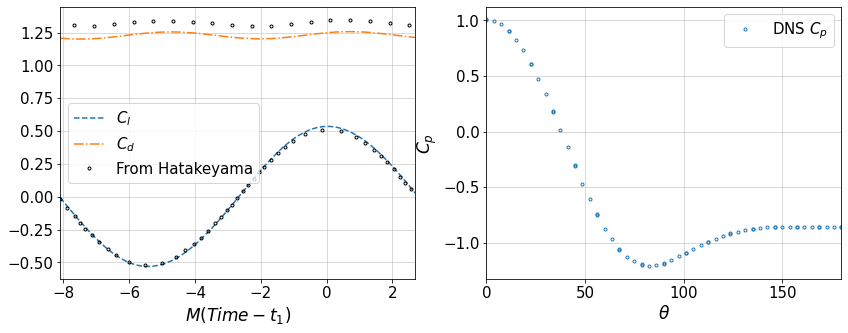

In [18]:
plt.figure(figsize=(14,5))
ax = plt.subplot(1,2,1)
#ap = ax.plot(time,cl,'--',label='$C_l$')

ap = ax.plot((time-238.5)*0.2,cl,'--',label='$C_l$')
ap = ax.plot((time-238.5)*0.2,cd,'-.',label='$C_d$')
ap = ax.plot(x_cl/5*10,paper_cl,'k.',label='From Hatakeyama')
ap = ax.plot(x_cd/5*10,paper_cd,'k.')
ap = ax.legend(loc='best')
ap = plt.xlabel('$M(Time-t_1)$')

plt.xlim([(time[0]-238.5)*0.2,(time[-1]-238.5)*0.2])

#ap = plt.ylabel('')
plt.grid()
ax = plt.subplot(1,2,2)
ap = ax.plot((theta_t)/pi*180,cp,'.',label='DNS $C_p$')
#ap = ax.plot(x_cp,paper_cp,'-.',label='From Hatakeyama')  ## from paper

ap = plt.xlabel('$\\theta$')
ap = plt.ylabel('$C_p$')
ap = ax.legend(loc='best')
plt.xlim([0,180])
#plt.xlim([50,60])
#plt.ylim([-1,-0.5])
plt.grid()

#print((theta_t+pi)/pi*180)
#print(cp)
print('cl amplitude = '+str(max(cl)))
print('cd amplitude = '+str((max(cd)-min(cd))/2))
print('cd mean = '+str((max(cd)+min(cd))/2))

In [19]:
print(np.sum(dA))
print(A)
print(max(cp))

3.403394135784045
3.403394135784045
1.0097179220779215


In [20]:
qq = np.array([2,1,0.5])
pp = np.array([[2,1,3],[7,9,2],[10,1,3]])
aa = np.sort(qq)
bb = np.argsort(qq)
cc = swap(pp,bb)
print(aa,bb,cc)

[0.5 1.  2. ] [2 1 0] [[ 3  1  2]
 [ 2  9  7]
 [ 3  1 10]]


Total pressure: $\Delta p = p - p_{\infty}$

mean pressure: $\Delta p_{mean}$

Fluctuation pressure: $\Delta \tilde{p}(x,t) = \Delta p(x,t) - \Delta p_{mean}(x)$

In [21]:
## Hatakeyama figure 4

dp,dpmean,dptuda = fluc_pressure(p,time)

tol = findSmallestDx(x,y)
dpt_0 = np.zeros(len(time))
dpt_90 = np.zeros(len(time))
dpt_90_ = np.zeros(len(time))
for i in range(len(time)):
    temp1 = 0
    temp2 = 0
    temp3 = 0
    k = 0 
    m = 0 
    n = 0
    for j in range(len(r)):
        if abs(r[j] - 0.5) <= tol:
        #if abs(r[j] - 0.5) <= tol/0.9*1.1 and abs(r[j] - 0.5) > tol:
            if theta[j] == 0.0:      # theta = 0 
                temp1 += dptuda[i][j]
                k += 1
        if abs(r[j] - 0.5) <= tol:
            if theta[j] == pi/2.:        # theta = 90 
                temp2 += dptuda[i][j]
                m += 1
            elif theta[j] == -pi/2.:        # theta = -90
                temp3 += dptuda[i][j]
                n += 1

    dpt_0[i] = temp1/k
    dpt_90[i] = temp2/m  
    dpt_90_[i] = temp3/n

dr_smallest = 0.04166700000000001


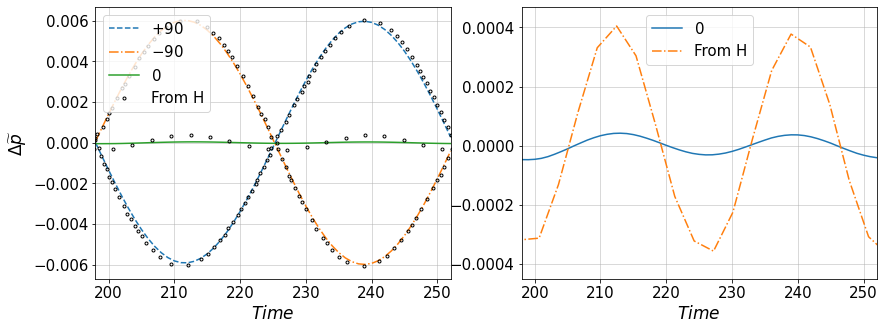

In [22]:
plt.figure(figsize=(14,5))
#plt.subplot(1,2,1)
ax = plt.subplot(1,2,1)
ap = ax.plot(time,dpt_90,'--',label='$+90$')
ap = ax.plot(time,dpt_90_,'-.',label='$-90$')
ap = ax.plot(time,dpt_0,'-',label='$0$')

ap = ax.plot((x_minus90-1824.4)*2,paper_minus90,'k.',label='From H')
ap = ax.plot((x_positive90-1824.4)*2,paper_positive90,'k.')
ap = ax.plot((x_at0-1824.4)*2,paper_at0,'k.')

ap = ax.legend(loc='best')
ap = plt.xlabel('$Time$')
ap = plt.ylabel('$\Delta \widetilde{p}$')

plt.xlim([time[0],time[-1]])

plt.grid()
ax = plt.subplot(1,2,2)
ap = ax.plot(time,dpt_0,'-',label='$0$')
ap = ax.plot((x_at0-1824.4)*2,paper_at0,'-.',label='From H')
ap = ax.legend(loc='best')
ap = plt.xlabel('$Time$')
plt.xlim([time[0],time[-1]])
#plt.ylim([-0.001,0.001])
plt.grid()

In [23]:
## Hatakeyama figure 6
dp,dpmean,dptuda = fluc_pressure(p,time)


xx = np.linspace(min(x),max(x),200)
yy = np.linspace(min(y),max(y),200)
t = 10
print('t = '+str(time[t]))
        
dptuda_plot = griddata((x, y), dptuda[t], (xx[None,:], yy[:,None]), method='cubic')
dpmean_plot = griddata((x, y), dpmean, (xx[None,:], yy[:,None]), method='cubic')
dp_plot = griddata((x, y), dp[t], (xx[None,:], yy[:,None]), method='cubic')

t = 208


Text(0, 0.5, 'y')

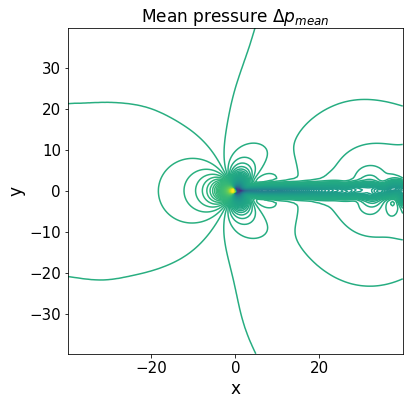

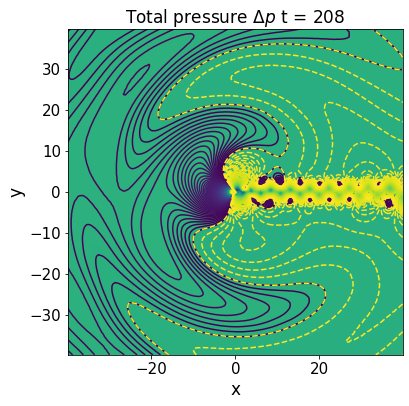

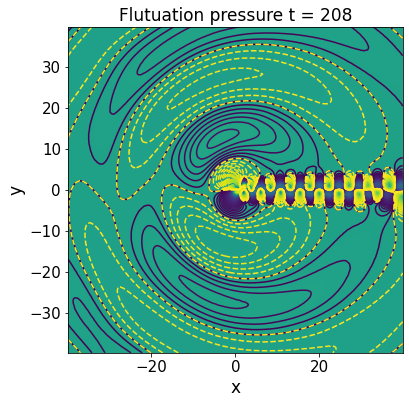

In [24]:
plt.figure(figsize=(6,6))
circle = plt.Circle((0.0,0.0),0.5,facecolor="w",edgecolor="k")
plt.axes().add_artist(circle)
plt.contour(xx,yy,dpmean_plot,280,linestyles='solid')
plt.title('Mean pressure $\Delta p_{mean}$')
plt.xlabel('x')
plt.ylabel('y')

plt.figure(figsize=(6,6))
circle = plt.Circle((0.0,0.0),0.5,facecolor="w",edgecolor="k")
plt.axes().add_artist(circle)
plt.contour(xx,yy,dp_plot,levels=np.linspace(0.0,0.0126,300),linestyles='solid')
plt.contour(xx,yy,dp_plot,levels=np.linspace(-0.0252,0.0,300),linestyles='dashed')

plt.contourf(xx,yy,dp_plot,levels=480,linestyles='dashed')
#plt.colorbar()
plt.title('Total pressure $\Delta p$ t = '+str(time[t]))
plt.xlabel('x')
plt.ylabel('y')


plt.figure(figsize=(6,6))
circle = plt.Circle((0.0,0.0),0.5,facecolor="w",edgecolor="k")
plt.axes().add_artist(circle)
plt.contour(xx,yy,dptuda_plot,levels=np.linspace(0.0, 0.00624,140),linestyles='solid')
plt.contour(xx,yy,dptuda_plot,levels=np.linspace(-0.00780,0.00,140),linestyles='dashed')

plt.contourf(xx,yy,dptuda_plot,280)
#plt.colorbar()
plt.title('Flutuation pressure t = '+str(time[t]))
plt.xlabel('x')
plt.ylabel('y')

In [25]:
### Figure 8
dp,dpmean,dptuda = fluc_pressure(p,time)

tol = 0.5/180*pi

t = 17
theta_ = np.array([50,78.5,120])
for j in range(len(theta_)):
    temp1 = np.asarray([])
    temp2 = np.asarray([])
    temp3 = np.asarray([])
    temp4 = np.asarray([])
    for i in range(len(r)):
        if abs(theta[i] - theta_[j]/180*pi) < tol:
            temp1 = np.concatenate((temp1,r[i]),axis=None)
            temp2 = np.concatenate((temp2,dp[t][i]),axis=None)
            temp3 = np.concatenate((temp3,dpmean[i]),axis=None)
            temp4 = np.concatenate((temp4,dptuda[t][i]),axis=None)
    if j == 0:
        r_50 = temp1
        dp_50 = temp2
        dpmean_50 = temp3
        dptuda_50 = temp4
    if j == 1:
        r_785 = temp1
        dp_785 = temp2
        dpmean_785 = temp3
        dptuda_785 = temp4
    if j == 2:
        r_120 = temp1
        dp_120 = temp2
        dpmean_120 = temp3
        dptuda_120 = temp4

In [26]:
def swap_1d(q,index):
    temp = np.zeros(q.shape[0])
    for i in range(q.shape[0]):
        temp[i] = q[i]
    for j in range(q.shape[0]):
        q[j] = temp[index[j]]
    return q

In [27]:
index1 = np.argsort(r_50)
r_50 = np.sort(r_50)
dp_50 = swap_1d(dp_50,index1)
dpmean_50 = swap_1d(dpmean_50,index1)
dptuda_50 = swap_1d(dptuda_50,index1)

index = np.argsort(r_785)
r_785 = np.sort(r_785)
dp_785 = swap_1d(dp_785,index)
dpmean_785 = swap_1d(dpmean_785,index)
dptuda_785 = swap_1d(dptuda_785,index)

index = np.argsort(r_120)
r_120 = np.sort(r_120)
dp_120 = swap_1d(dp_120,index)
dpmean_120 = swap_1d(dpmean_120,index)
dptuda_120 = swap_1d(dptuda_120,index)

t = 215


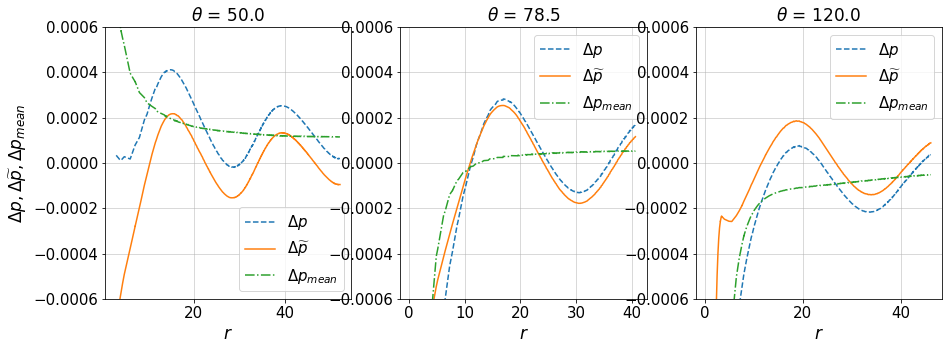

In [28]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ap = ax.plot(r_50,dp_50,'--',label='$\Delta p$')
ap = ax.plot(r_50,dptuda_50,'-',label='$\Delta \widetilde{p}$')
ap = ax.plot(r_50,dpmean_50,'-.',label='$\Delta p_{mean}$')
plt.ylim([-6*0.0001,6*0.0001])
plt.title('$\\theta$ = '+str(theta_[0]))
plt.legend(loc='best')
plt.xlabel('$r$')
plt.ylabel('$\Delta p,\Delta \widetilde{p},\Delta p_{mean}$')
plt.grid()

ax = plt.subplot(1,3,2)
ap = ax.plot(r_785,dp_785,'--',label='$\Delta p$')
ap = ax.plot(r_785,dptuda_785,'-',label='$\Delta \widetilde{p}$')
ap = ax.plot(r_785,dpmean_785,'-.',label='$\Delta p_{mean}$')
plt.ylim([-6*0.0001,6*0.0001])
plt.title('$\\theta$ = '+str(theta_[1]))
plt.legend(loc='best')
plt.xlabel('$r$')
plt.grid()

ax = plt.subplot(1,3,3)
ap = ax.plot(r_120,dp_120,'--',label='$\Delta p$')
ap = ax.plot(r_120,dptuda_120,'-',label='$\Delta \widetilde{p}$')
ap = ax.plot(r_120,dpmean_120,'-.',label='$\Delta p_{mean}$')
plt.ylim([-6*0.0001,6*0.0001])
plt.title('$\\theta$ = '+str(theta_[2]))
plt.legend(loc='best')
plt.xlabel('$r$')
plt.grid()

print('t = '+str(time[t]))


Doppler effect: $\Delta \tilde{p}^M(r',\theta,t) = \frac{r}{r'}\Delta \tilde{p}(r,\theta,t)$

with $r' = r(1-M*cos\theta)$

In [182]:
### Hatakeyama figure 11

dp,dpmean,dptuda = fluc_pressure(p,time)
rtuda = r/(1 - 0.2*np.cos(theta))


dptudaM = np.zeros([dptuda.shape[0],dptuda.shape[1]])
rtuda_measure = 35
tol = 0.01
for i in range(len(time)):  
    r_plot = np.asarray([])
    temp = np.asarray([])
    theta_plot = np.asarray([])
    for j in range(dptuda.shape[1]):
        if abs(rtuda[j] - rtuda_measure) <= tol:
            theta_plot = np.concatenate((theta_plot,theta[j]),axis=None)
            r_plot = np.concatenate((r_plot,r[j]),axis=None)
            temp = np.concatenate((temp,dptuda[i][j]),axis=None)
            
    if i == 0:
        dptudaM = np.zeros([dptuda.shape[0],r_plot.shape[0]])

    dptudaM[i] = temp*r_plot/rtuda_measure

Text(0.5, 1.0, 'time = 220  $|\\Delta {p}|_{max}$ = 0.0002')

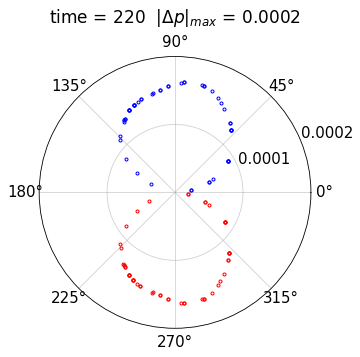

In [183]:
plt.figure(figsize=(14,5))
#plt.subplot(1,2,1)
t = 22
for i in range(theta_plot.shape[0]):
    if dptudaM[20][i] >= 0:
        plt.polar(theta_plot[i],abs(dptudaM[t][i]),'r.',label='<0')
    else:
        plt.polar(theta_plot[i],abs(dptudaM[t][i]),'b.',label='<0')
plt.ylim([0,0.0002])
plt.yticks([0.0001, 0.0002])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
plt.grid(True)
#plt.legend(loc='best')
plt.title('time = '+str(time[t])+'  $|\Delta {p}|_{max}$ = 0.0002', va='bottom')


In [ ]:
### Hatakeyama figure 12

In [39]:
def data_load_Hatakeyama_8():
    
    #### fugure 3 cp plot
    paper_dp8_theta = np.asarray([])
    paper_dpM8_theta = np.asarray([])
    paper_dp8 = np.asarray([])
    paper_dpM8 = np.asarray([])
    
    for i in open("./from_paper/dptuda8.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        paper_dp8 = np.concatenate((paper_dp8,datContent[0]),axis=None)     
        paper_dp8_theta = np.concatenate((paper_dp8_theta,datContent[1]),axis=None)
        
    for i in open("./from_paper/dptudaM8.csv").readlines():
        datContent = i.strip().split()                  #magic
        datContent = np.asarray(datContent)             #convert list to array
        datContent = datContent.astype(np.float64)      #convert str element to float
        
        paper_dpM8 = np.concatenate((paper_dpM8,datContent[0]),axis=None)     
        paper_dpM8_theta = np.concatenate((paper_dpM8_theta,datContent[1]),axis=None)
        
        
    return paper_dp8_theta,paper_dp8,paper_dpM8_theta,paper_dpM8

In [40]:
paper_dp8_theta,paper_dp8,paper_dpM8_theta,paper_dpM8 = data_load_Hatakeyama_8()

In [192]:
## calculate dptuda_rms when r = r'_measure*Dopler function
start_ = 198    #195
end_ = 252      #255
time_temp = np.arange(start_,end_+1,1)
dp,dpmean,dptuda = fluc_pressure(p,time_temp)
rtuda_measure = 35
rtuda=r/(1 - 0.2*np.cos(theta))

### do the rms to the dptudaM

dptuda_ms,dptuda_rms = rms(dptuda,time_temp)
dptudaM_ms,dptudaM_rms = rms(dptudaM,time_temp)

In [193]:

theta_plot1 = np.asarray([])
dptuda_rms_plot = np.asarray([])
tol = 0.03
for i in range(len(r)):
    if abs(rtuda[i] - rtuda_measure) <= tol:
        theta_plot1 = np.concatenate((theta_plot1,theta[i]),axis=None)
        dptuda_rms_plot = np.concatenate((dptuda_rms_plot,dptuda_rms[i]),axis=None)
        #    break

In [194]:
## scale paper value back to r_measure
paper_dp8_scale = (75/35)**(0.5)*paper_dp8

Text(0.5, 1.0, "red: from H; blue: $\\Delta \\tilde{p}_{rms}$ \n $|\\Delta {p}|_{max}$ = 0.00015, measured at r' = 35")

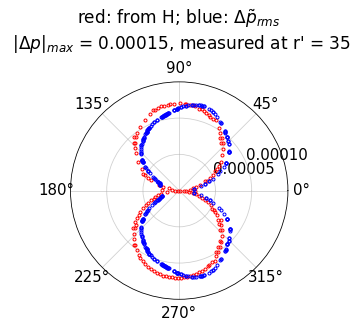

In [196]:
#a
plt.polar(paper_dp8_theta/180*pi,paper_dp8_scale,'r.')
plt.polar(theta_plot1,dptuda_rms_plot,'b.')
plt.ylim([0,0.00015])
plt.yticks([0.00005, 0.0001])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
plt.grid(True)
#plt.legend(loc='best')
plt.title('red: from H; blue: $\Delta \\tilde{p}_{rms}$ \n $|\Delta {p}|_{max}$ = 0.00015, measured at r\' = 35', va='bottom')

Text(0.5, 1.0, "red: from H; blue: $\\Delta \\tilde{p}^{M}_{rms}$ \n $|\\Delta {p}|_{max}$ = 0.00015, measured at r' = 35")

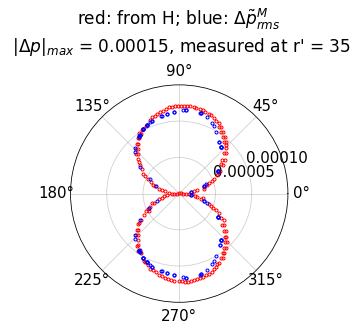

In [191]:
#b
paper_dpM8_scale = (75/35)**(0.5)*paper_dpM8

plt.polar(paper_dpM8_theta/180*pi,paper_dpM8_scale,'r.')
plt.polar(theta_plot,abs(dptudaM_rms),'b.')


plt.ylim([0,0.00015])
plt.yticks([0.00005, 0.0001])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
plt.grid(True)
#plt.legend(loc='best')
plt.title('red: from H; blue: $\Delta \\tilde{p}^{M}_{rms}$ \n $|\Delta {p}|_{max}$ = 0.00015, measured at r\' = 35', va='bottom')

In [452]:
## Hatakeyama figure 13
# 13.a
dp,dpmean,dptuda = fluc_pressure(p,time)

tol = 0.1/180*pi
theta_ = 90

r_plot=[]
r_plot = np.asarray(r_plot)
for i in range(len(time)):
    temp=[]
    temp = np.asarray(temp)
    for j in range(len(r)):
        if abs(pi - theta[j] - theta_/180*pi) <= tol:
            if i == 0:
                r_plot = np.concatenate((r_plot,r[j]),axis=None)
                
            temp = np.concatenate((temp,dptuda[i][j]),axis=None)
            
            
    if i == 0:
        dptuda_plot = np.zeros([len(time),len(temp)])
    dptuda_plot[i] = temp

In [453]:
def find_peaks(temp,r_temp):
    """
    ## do some average:
    temp1 = np.asarray([])
    temp2 = np.asarray([])
    for i in range(len(temp)):
        j = 0
        a = 0
        while(r_temp[i] = r_temp[i+j]):
            a += temp[i]
            j += 1
        a = a/len(a)
        temp1 = np.concatenate((temp1,a),axis=None)
        temp2 = """
    
    index = np.asarray([])
    
    for i in range(4,len(temp)-4):
        if r_temp[i] == r_temp[i+1] and r_temp[i] != r_temp[i+2] and r_temp[i] != r_temp[i-1]:
            if (temp[i] - temp[i-1]) > 0 and (temp[i+2] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)
                
        elif r_temp[i] == r_temp[i-1] and r_temp[i] != r_temp[i-2] and r_temp[i] != r_temp[i+1]:
            if (temp[i] - temp[i-2]) > 0 and (temp[i+1] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)
                
        elif r_temp[i] == r_temp[i+3] and r_temp[i] == r_temp[i+2] and r_temp[i] == r_temp[i+1]:
            if (temp[i] - temp[i-1]) > 0 and (temp[i+4] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)
                
        elif r_temp[i] == r_temp[i-1] and r_temp[i] == r_temp[i+2] and r_temp[i] == r_temp[i+1]:
            if (temp[i] - temp[i-2]) > 0 and (temp[i+3] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)
                
        elif r_temp[i] == r_temp[i-1] and r_temp[i] == r_temp[i-2] and r_temp[i] == r_temp[i+1]:
            if (temp[i] - temp[i-3]) > 0 and (temp[i+2] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)
            
        elif r_temp[i] == r_temp[i-1] and r_temp[i] == r_temp[i-2] and r_temp[i] == r_temp[i-3]:
            if (temp[i] - temp[i-4]) > 0 and (temp[i+1] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)
        
        else:
            if (temp[i] - temp[i-1]) > 0 and (temp[i+1] - temp[i]) < 0:
                index = np.concatenate((index,i),axis=None)

                
    index = index.astype(np.int32)
    
        
    return index[0]

In [454]:
#13.b
## apply a filter before doing the peak detection, reason: near wall dp -> large, avoid this region
"""!! Current problem overlapping points"""

r_peak_positive = np.asarray([])
r_peak_negative = np.asarray([])

dptuda_peak_positive = np.asarray([])
dptuda_peak_negative = np.asarray([])
for i in range(len(time)):
    #i = 0
    temp = np.asarray([])
    r_temp = np.asarray([])
    for j in range(len(r_plot)):
        if r_plot[j] > 10:
        #if r_plot[j] > 10 and r_plot[j] < 30:
            temp = np.concatenate((temp,dptuda_plot[i][j]),axis=None)
            r_temp = np.concatenate((r_temp,r_plot[j]),axis=None)
    
    index = np.argsort(r_temp)
    r_temp = np.sort(r_temp)
    temp = swap_1d(temp,index)
    
    #index = scipy.signal.find_peaks_cwt(abs(temp),np.arange(1,10))
    #index,_ = scipy.signal.find_peaks(abs(temp),distance = int(len(temp)/2))
    
    
    #find positive peak
    index1 = find_peaks((temp),r_temp)
    
    #plt.figure()
    #plt.plot(r_temp,(temp),'.')
    #plt.plot(r_temp[index1],temp[index1],'.')
    
    dptuda_peak_positive = np.concatenate((dptuda_peak_positive,temp[index1]),axis=None)    
    r_peak_positive = np.concatenate((r_peak_positive,r_temp[index1]),axis=None)
    
    #find negative peak
    index2 = find_peaks(-(temp),r_temp)
    
    dptuda_peak_negative = np.concatenate((dptuda_peak_negative,temp[index2]),axis=None)    
    r_peak_negative = np.concatenate((r_peak_negative,r_temp[index2]),axis=None)
    
    

In [455]:
print(temp[267],temp[268],temp[269],temp[270])
print(r_temp[267],r_temp[268],r_temp[269],r_temp[270])

0.00015938181818186354 0.00015921818181822853 0.00015921818181822853 0.0001590727272727698
35.9 36.1611 36.1611 36.4222


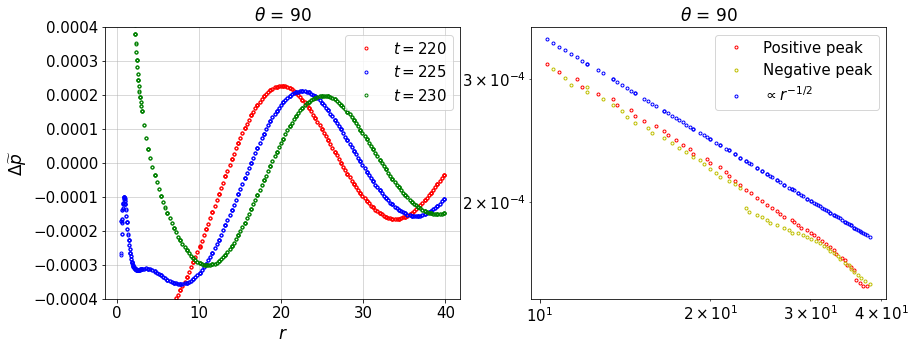

In [456]:
plt.figure(figsize=(14,5))

step = 5
ax = plt.subplot(1,2,1)
ap = ax.plot(r_plot,dptuda_plot[t],'r.',label='$t = $'+str(time[t]))
ap = ax.plot(r_plot,dptuda_plot[t+step],'b.',label='$t = $'+str(time[t+step]))
ap = ax.plot(r_plot,dptuda_plot[t+step*2],'g.',label='$t = $'+str(time[t+step*2]))
plt.ylim([-4*0.0001,4*0.0001])
plt.title('$\\theta$ = '+str(theta_))
plt.legend(loc='best')
plt.xlabel('$r$')
plt.ylabel('$\Delta \widetilde{p}$')
plt.grid()

ax = plt.subplot(1,2,2)
#ap = ax.plot(r_plot,(dptuda_plot[t]),'g.',label='$t = $'+str(time[t]))

ap = ax.plot(r_peak_positive,abs(dptuda_peak_positive),'r.',label='Positive peak')
ap = ax.plot(r_peak_negative,abs(dptuda_peak_negative),'y.',label='Negative peak')

ap = ax.plot(r_peak_positive,0.0011/np.sqrt(r_peak_positive),'b.',label='$\propto r^{-1/2}$')
ap = ax.plot(r_peak_negative,0.0011/np.sqrt(r_peak_negative),'b.')


plt.title('$\\theta$ = '+str(theta_))
#plt.ylim([-4*0.0001,4*0.0001])
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')

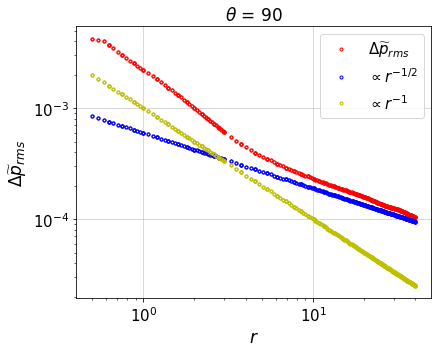

In [485]:
## rms to dptuda
dptuda_ms,dptuda_rms = rms(dptuda,time)
r_plot=[]
r_plot = np.asarray(r_plot)

temp=[]
temp = np.asarray(temp)
theta_ = 90
tol = 0.0001*pi/180
for j in range(len(r)):
    if abs(pi - theta[j] - theta_/180*pi) <= tol:
        
        r_plot = np.concatenate((r_plot,r[j]),axis=None)

        temp = np.concatenate((temp,dptuda_rms[j]),axis=None)



dptuda_rms_plot = np.zeros(len(temp))
dptuda_rms_plot = temp

plt.figure(figsize=(14,5))

ax = plt.subplot(1,2,1)
ap = ax.plot(r_plot,dptuda_rms_plot,'r.',label='$\Delta \widetilde{p}_{rms}$')
ap = ax.plot(r_plot,0.0006/np.sqrt(r_plot),'b.',label='$\propto r^{-1/2}$')
ap = ax.plot(r_plot,0.001/r_plot,'y.',label='$\propto r^{-1}$')

plt.title('$\\theta$ = '+str(theta_))
plt.legend(loc='best')
plt.xlabel('$r$')
plt.ylabel('$\Delta \widetilde{p}_{rms}$')
plt.grid()
plt.yscale('log')
plt.xscale('log')

In [458]:
## rms to dptuda if r > 10
"""!!!!!! Don't run it easily!!!!!!!!!!!!!!!!!!!!"""

rr=[]
rr = np.asarray(rr)
tt = []
tt = np.asarray(tt)

for i in range(len(time)):
    temp=[]
    temp = np.asarray(temp)
    for j in range(len(r)):
        if r[j] >= 10:
            temp = np.concatenate((temp,dptuda[i][j]),axis=None)
            if i == 0:
                rr = np.concatenate((rr,r[j]),axis=None)
                tt = np.concatenate((tt,theta[j]),axis=None)
    if i == 0:
        dptuda_r = np.zeros([len(time),len(temp)])
    dptuda_r[i] = temp
    print(i)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


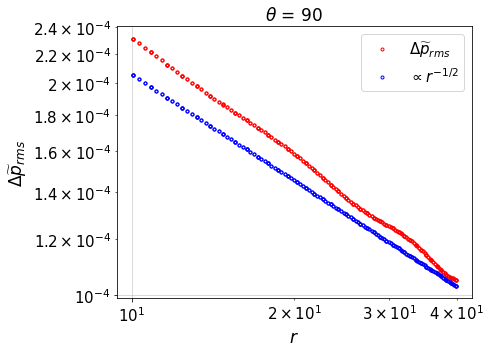

In [459]:
dptuda_r_ms,dptuda_r_rms = rms(dptuda_r,time)
r_plot=[]
r_plot = np.asarray(r_plot)

temp=[]
temp = np.asarray(temp)
theta_ = 90
tol = 0.0*pi/180
for j in range(len(rr)):
    if abs(pi - tt[j] - theta_/180*pi) <= tol:
        
        r_plot = np.concatenate((r_plot,rr[j]),axis=None)

        temp = np.concatenate((temp,dptuda_r_rms[j]),axis=None)



dptuda_rms_plot = np.zeros(len(temp))
dptuda_rms_plot = temp

plt.figure(figsize=(14,5))

ax = plt.subplot(1,2,1)
ap = ax.plot(r_plot,dptuda_rms_plot,'r.',label='$\Delta \widetilde{p}_{rms}$')
ap = ax.plot(r_plot,0.00065/np.sqrt(r_plot),'b.',label='$\propto r^{-1/2}$')

plt.title('$\\theta$ = '+str(theta_))
plt.legend(loc='best')
plt.xlabel('$r$')
plt.ylabel('$\Delta \widetilde{p}_{rms}$')

plt.yscale('log')
plt.xscale('log')
plt.grid()

In [460]:
### Hatakeyama figure 5
"""!!!!!!!!!!!!!!! reload data!!!!!!!!!!!!!!"""
# load data set
def data_load_velocity(time,t,start,end):
    xmin = -2
    xmax = 16
    ymin = -4
    ymax = 4

    x_ = np.asarray([])
    y_ = np.asarray([])
    u_ = np.asarray([])
    v_ = np.asarray([])

    x = np.asarray([])
    y = np.asarray([])
    u = np.asarray([])
    v = np.asarray([])
    #datContent = [i.strip().split() for i in open("./test.dat").readlines()]
    k = 0
    #for i in open("../send/"+str(time)+".dat").readlines():
    for i in open("./datFiles/"+str(time)+".dat").readlines():
        if k > headline - 1:                                #get away with headers
            datContent = i.strip().split()                  #magic

            datContent = np.asarray(datContent)             #convert list to array
            datContent = datContent.astype(np.float64)      #convert str element to float
    
            if k < Lines*1 + headline :
                    x_ = np.concatenate((x_,datContent),axis=None)
            elif k < Lines*2 + headline :
                    y_ = np.concatenate((y_,datContent),axis=None)
            elif k < Lines*7 + headline and k > Lines*6 + headline - 1:
                    u_ = np.concatenate((u_,datContent),axis=None)
            elif k < Lines*8 + headline and k > Lines*7 + headline - 1:
                    v_ = np.concatenate((v_,datContent),axis=None)
            

        k+=1
        if k > Lines*8 + headline:
            break
    
    for i in range(len(x_)):
        if x_[i] < xmax and y_[i] < ymax and x_[i] > xmin and y_[i] > ymin:
            x = np.concatenate((x,x_[i]),axis=None)
            y = np.concatenate((y,y_[i]),axis=None)
            u = np.concatenate((u,u_[i]),axis=None)
            v = np.concatenate((v,v_[i]),axis=None)
    
    print('Completed: '+str(time-start+1)+'/'+str(end-start+1)+'\n')
    
    if t == 0:
        return x,y,u,v
    else:
        return u,v

In [461]:
# load data set within the time duration
startw = 200    #195
endw = 200      #255
timew = np.arange(startw,endw+1,1)
xw,yw,u,v = data_load_velocity(timew[0],0,startw,endw)


Completed: 1/1



In [462]:
xx = np.linspace(min(xw),max(xw),400)
yy = np.linspace(min(yw),max(yw),200)

        
uu = griddata((xw, yw), u, (xx[None,:], yy[:,None]), method='cubic')
vv = griddata((xw, yw), v, (xx[None,:], yy[:,None]), method='cubic')


w = np.nan*np.ones([yy.shape[0],xx.shape[0]])
for i in range(1,xx.shape[0]-1):
    for j in range(1,yy.shape[0]-1):
        if abs(xx[i]**2+yy[j]**2) >= 0.5**2 :
            w[j][i] = (vv[j][i+1] - vv[j][i-1])/(xx[i+1]-xx[i-1]) - (uu[j+1][i] - uu[j-1][i])/(yy[j+1]-yy[j-1])
        
     

Text(0.5, 1.0, 'time = 200')

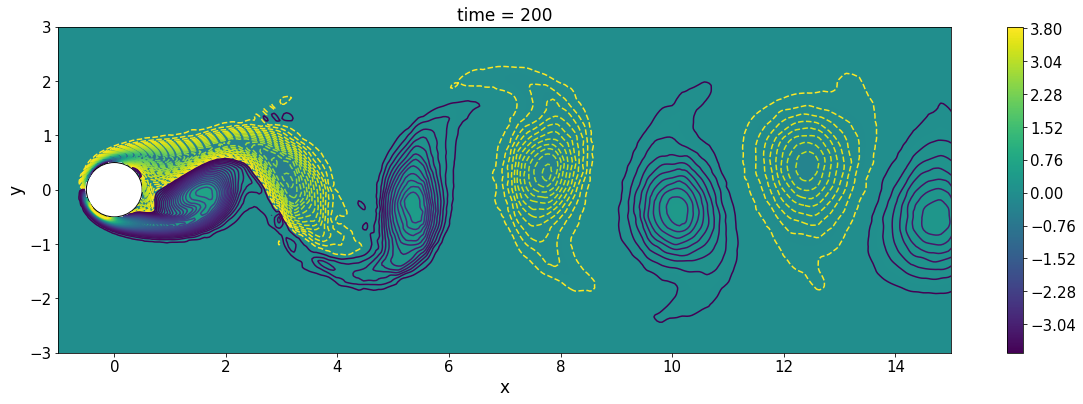

In [463]:
plt.figure(figsize=(20,6))
circle = plt.Circle((0.0,0.0),0.5,facecolor="w",edgecolor="k")
plt.axes().add_artist(circle)
plt.contourf(xx,yy,w,400)
plt.colorbar()
plt.contour(xx,yy,w,levels=np.linspace(-3,-0.02,80),linestyles='dashed')
plt.contour(xx,yy,w,levels=np.linspace(0.02,3,80),linestyles='solid')
#plt.clim(-8,-4)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,15])
plt.ylim([-3,3])


plt.title('time = '+str(timew[0]))

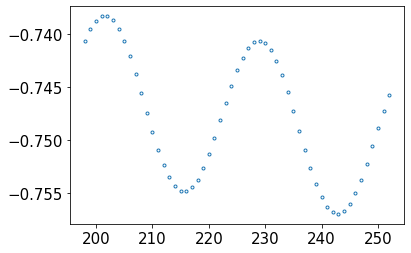

In [464]:
# calculate pressure on the cylinder surface (total force)
p_surf=np.zeros(len(time))

tol = 0.0001
for j in range(len(time)):
    p_temp = 0
    for i in range(len(r)):
        if abs(r[i] - 0.5) <= tol:
            p_temp += p[j][i]-1/1.4
       
    p_surf[j] = p_temp
    
plt.figure()
plt.plot(time,p_surf,'.',label='$\Delta p$')
#plt.ylim([-1,1])

In [3]:
## For benchmark use. write the initial condition for pyfr simulation
### Hatakeyama figure 5
"""!!!!!!!!!!!!!!! reload data!!!!!!!!!!!!!!"""
# load data set
def data_load_pyfr():
    
    x = np.asarray([])
    y = np.asarray([])
    rho = np.asarray([])
    u = np.asarray([])
    v = np.asarray([])
    p = np.asarray([])
    #datContent = [i.strip().split() for i in open("./test.dat").readlines()]
    k = 0
    #for i in open("../send/"+str(time)+".dat").readlines():
    for i in open("./datFiles/255.dat").readlines():
        if k > headline - 1:                                #get away with headers
            datContent = i.strip().split()                  #magic

            datContent = np.asarray(datContent)             #convert list to array
            datContent = datContent.astype(np.float64)      #convert str element to float
    
            if k < Lines*1 + headline :
                    x = np.concatenate((x,datContent),axis=None)
            elif k < Lines*2 + headline :
                    y = np.concatenate((y,datContent),axis=None)
            elif k < Lines*3 + headline :
                    rho = np.concatenate((rho,datContent),axis=None)
            elif k < Lines*7 + headline and k > Lines*6 + headline - 1:
                    u = np.concatenate((u,datContent),axis=None)
            elif k < Lines*8 + headline and k > Lines*7 + headline - 1:
                    v = np.concatenate((v,datContent),axis=None)
            elif k < Lines*9 + headline and k > Lines*8 + headline - 1:
                    p = np.concatenate((p,datContent),axis=None)
            

        k+=1
        if k > Lines*9 + headline:
            break
    
    
    
    print('Completed! \n')
    
    
    return x,y,rho,u,v,p

In [4]:
x,y,rho,u,v,p = data_load_pyfr()

Completed! 



In [21]:
f = open('/Users/yuanzhenyang/software/yuan_compute/pyfr/rectangular_sponge/initial/rho.txt', "a")
for i in range(len(rho)):
    f.write(str(rho[i])+"    ")
f.close()

f = open('/Users/yuanzhenyang/software/yuan_compute/pyfr/rectangular_sponge/initial/u.txt', "a")
for i in range(len(rho)):
    f.write(str(u[i])+"    ")
f.close()

f = open('/Users/yuanzhenyang/software/yuan_compute/pyfr/rectangular_sponge/initial/v.txt', "a")
for i in range(len(rho)):
    f.write(str(v[i])+"    ")
f.close()

f = open('/Users/yuanzhenyang/software/yuan_compute/pyfr/rectangular_sponge/initial/p.txt', "a")
for i in range(len(rho)):
    f.write(str(p[i])+"    ")
f.close()
